# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

### 5. Train an agent

Load the Python code for the model, the agent and a learning environment.

In [6]:
%run model.py

In [7]:
%run agent.py

In [8]:
%run learning.py

Create an initialize an agent. 

Possible value combinations for dqnetwork and update_type:
    
    - DQN: dqnetwork = DQNetwork, update_type = dqn
    - DoubleDQN: dqnetwork = DQNetwork, update_type = double_dqn
    - Dueling Double DQN: dqnetwork = DuelingQNetwork, update_type = double_dqn
    

In [22]:
# Initialize the agent 
agent = Agent(state_size=state_size, action_size=action_size, dqnetwork= DuelingQNetwork, update_type='double_dqn', seed=42)

We have to specify several hyperparameters:

In [10]:
# Set Parameters
n_episodes = 2000
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.99

Reset the environment, use training mode.

In [23]:
env_info = env.reset(train_mode=True)[brain_name]

Create a learning environment, the last parameter is the file name of the saved network weights.

In [24]:
dqn_learning = DQNLearning(agent, env, brain_name, n_episodes, max_t, eps_start, eps_end, eps_decay, "dueling_dqn.pth")

Now we can train the agent by calling the learning method.

In [25]:
# Train the agent
scores = dqn_learning.learning()

Episode 100 	Average score:  1.46
Episode 200 	Average score:  6.20
Episode 300 	Average score:  9.81
Episode 400 	Average score:  10.38
Episode 500 	Average score:  12.24
Episode 542 	Average score:  13.06
Environment solved in  442 episodes!	Average Score:  13.06


A plot of the scores over the episodes is shown below:

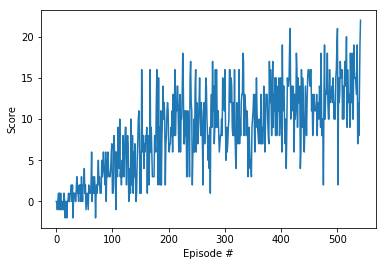

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('dueling_dqn_scores.png', bbox_inches='tight')
plt.show()


### 6. See an Agent in action

Load the network weigths. 

The network weigths have to match the agent type. You cannot load the network weights for a dueling DQN into an agent created with a DQN.

In [28]:
agent.qnetwork_local.load_state_dict(torch.load('dueling_dqn.pth'))

Now you can see the agent doing its job.

In [31]:
env_info = env.reset(train_mode=False)[brain_name] # Reset the environment in non training mode
state = env_info.vector_observations[0]            # Get the intial state
score = 0                                          # Initialize the score to 0
while True:
    action = agent.get_action(state)               # Get an action
    env_info = env.step(action)[brain_name]        # Execute the action
    next_state = env_info.vector_observations[0]   # Get the next state
    reward = env_info.rewards[0]                   # Get the reward
    done = env_info.local_done[0]                  # Check whether episode is done
    score += reward                                # Increment Score
    state = next_state                             # Get to the next state
    if done:                                       # Exit loop in case episode is done
        break
    
print("Score: {}".format(score))

Score: 13.0


When finished, you can close the environment.

In [ ]:
env.close()